In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


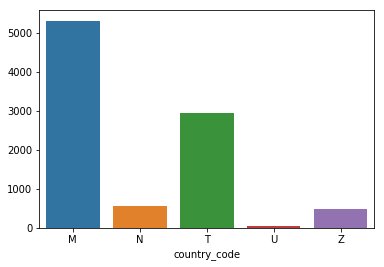

In [3]:
country=data.groupby('country_code').count()['portfolio_id']
sns.barplot(country.index,country.values)
plt.show()

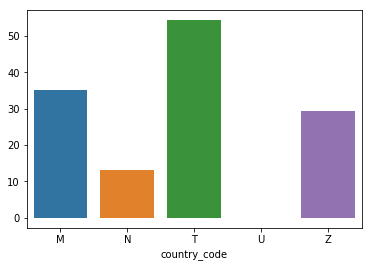

In [4]:
country_return_sum = data.groupby('country_code').sum()['return']
sns.barplot(country_return_sum.index,country_return_sum.values)
plt.show()
#country_return_sum

In [5]:
unit_return_country = country_return_sum/country
unit_return_country

country_code
M    0.006641
N    0.023418
T    0.018381
U   -0.001524
Z    0.061187
dtype: float64

In [6]:
temp =pd.DataFrame(unit_return_country)
temp.columns=[['unit_return']]
temp['country_code']=temp.index

temp

In [7]:
data=data.merge(temp,how='left',on='country_code')
#del temp

In [8]:
data=data.drop(['country_code'],axis=1)
data.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,unit_return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496,0.018381
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496,0.023418
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496,0.018381
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496,0.018381
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496,0.018381


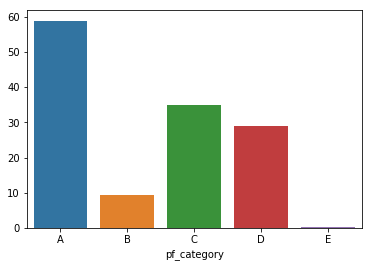

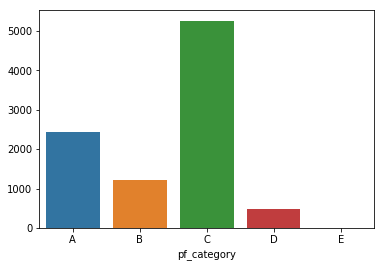

,pf_cat,pf_category
pf_category,,
A,0.024283,A
B,0.007685,B
C,0.006618,C
D,0.061714,D
E,0.066380,E


In [9]:
pf_cat=data.groupby('pf_category').sum()['return']

sns.barplot(pf_cat.index,pf_cat.values)
plt.show()
pf_cat_count = data.groupby('pf_category').count()['portfolio_id']
sns.barplot(pf_cat_count.index,pf_cat_count.values)
plt.show()
pf_cat= pf_cat/pf_cat_count
pf_cat_df = pd.DataFrame(pf_cat)
pf_cat_df.columns=[['pf_cat']]
pf_cat_df['pf_category']=pf_cat_df.index
pf_cat_df

In [10]:
data=data.merge(pf_cat_df,how='left',on='pf_category')
data=data.drop(['pf_category'],axis=1)


In [11]:
data.groupby('office_id').count()['portfolio_id'].argmax()

'OFF00001002'

In [12]:
data['profit_loss']=data.sold-data.bought
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,unit_return,pf_cat,profit_loss
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496,0.018381,0.007685,190336.749636
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496,0.023418,0.024283,662563.265958
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496,0.018381,0.024283,94467.039667
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496,0.018381,0.024283,304158.569044
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496,0.018381,0.007685,259843.134474


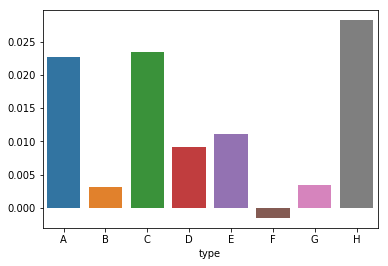

In [13]:
return_type=data.groupby('type')['return'].sum()/data.groupby('type').count()['portfolio_id']
sns.barplot(return_type.index,return_type.values)
plt.show()
return_type_df = pd.DataFrame(return_type)
return_type_df.columns=[['return_type']]
return_type_df['type'] = return_type_df.index
data=data.merge(return_type_df,how='left',on='type')
data=data.drop(['type'],axis=1)

In [14]:
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,hedge_value,status,return,unit_return,pf_cat,profit_loss,return_type
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,NaN,NaN,0.02496,0.018381,0.007685,190336.749636,0.003099
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,NaN,NaN,0.05496,0.023418,0.024283,662563.265958,0.023418
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,NaN,NaN,0.02496,0.018381,0.024283,94467.039667,0.022598
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,NaN,NaN,0.02496,0.018381,0.024283,304158.569044,0.022598
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,NaN,NaN,0.02496,0.018381,0.007685,259843.134474,0.003099


In [15]:
data['date_gapslc']=data.sell_date - data.creation_date
data['date_gapcst'] = data.creation_date - data.sell_date

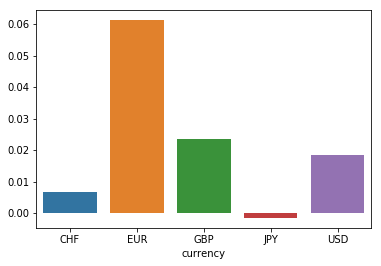

In [16]:
return_currency=data.groupby('currency')['return'].sum()/data.groupby('currency').count()['portfolio_id']
sns.barplot(return_currency.index,return_currency.values)
plt.show()
return_currency_df = pd.DataFrame(return_currency)
return_currency_df.columns=[['return_currency']]
return_currency_df['currency'] = return_currency_df.index
data=data.merge(return_currency_df,how='left',on='currency')
data=data.drop(['currency'],axis=1)

In [17]:
data.head()

,portfolio_id,desk_id,office_id,start_date,sold,euribor_rate,libor_rate,bought,creation_date,indicator_code,...,hedge_value,status,return,unit_return,pf_cat,profit_loss,return_type,date_gapslc,date_gapcst,return_currency
0,PF00001002,DSK00001001,OFF00001002,20040720,110000000.0,0.02074,2.332216,1.098097e+08,20040720,NaN,...,NaN,NaN,0.02496,0.018381,0.007685,190336.749636,0.003099,92,-92,0.018381
1,PF00001003,DSK00001002,OFF00001001,20040709,176671000.0,0.02074,5.269617,1.760084e+08,20040723,NaN,...,NaN,NaN,0.05496,0.023418,0.024283,662563.265958,0.023418,89,-89,0.023418
2,PF00001005,DSK00001004,OFF00001001,20040723,56474000.0,0.02074,2.332216,5.637953e+07,20040723,NaN,...,NaN,NaN,0.02496,0.018381,0.024283,94467.039667,0.022598,94,-94,0.018381
3,PF00001006,DSK00001005,OFF00001001,20040609,164813000.0,0.02074,2.332216,1.645088e+08,20040723,NaN,...,NaN,NaN,0.02496,0.018381,0.024283,304158.569044,0.022598,-10,10,0.018381
4,PF00001007,DSK00001005,OFF00001002,20040609,140800000.0,0.02074,2.332216,1.405402e+08,20040723,NaN,...,NaN,NaN,0.02496,0.018381,0.007685,259843.134474,0.003099,-10,10,0.018381


In [18]:
data.columns

Index(['portfolio_id', 'desk_id', 'office_id', 'start_date', 'sold',
       'euribor_rate', 'libor_rate', 'bought', 'creation_date',
       'indicator_code', 'sell_date', 'hedge_value', 'status', 'return',
       'unit_return', 'pf_cat', 'profit_loss', 'return_type', 'date_gapslc',
       'date_gapcst', 'return_currency'],
      dtype='object')

In [19]:
use_col = ['portfolio_id', 'sold',
       'euribor_rate', 'libor_rate', 'bought', 
       'unit_return', 'pf_cat', 'profit_loss', 'return_type', 'date_gapslc',
       'date_gapcst', 'return_currency']

In [20]:
X=data[use_col]
y=data['return']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)

In [22]:
X_train=X_train.drop(['portfolio_id'],axis=1)
X_train=X_train.fillna(X_train.mean())

In [23]:
from sklearn.svm import SVR

In [24]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)
#y_lin = svr_lin.fit(X_train, y_train).predict(X_train)
#y_poly = svr_poly.fit(X_train, y_train).predict(X_train)

In [31]:
r2_score(y_train,pd.DataFrame(y_rbf))

-17.711176611140299

In [25]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)

In [26]:
reg.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9917250454088284e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
predict_ridge = reg.predict(X_train)

In [28]:
predict_ridge

array([ 0.01053107,  0.0466769 ,  0.0141103 , ...,  0.04760446,
        0.00358263,  0.04840026])

In [29]:
y_pred = pd.DataFrame(predict_ridge)

In [98]:
r2_score(y_train,y_pred)

0.76589139081707636

In [100]:
X_test=X_test.drop(['portfolio_id'],axis=1)
X_test=X_test.fillna(X_test.mean())
y_pred = reg.predict(X_test)

In [101]:
y_pred = pd.DataFrame(y_pred)

In [102]:
r2_score(y_test,y_pred)

0.53014393064395993

In [103]:
from sklearn import linear_model
lasso_mod = linear_model.Lasso(alpha = 0.1)

In [104]:
lasso_mod.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
predict_lasso = lasso_mod.predict(X_train)
y_pred = pd.DataFrame(predict_lasso)
r2_score(y_train,y_pred)

0.24325020633781758

In [ ]:
#y_poly = svr_poly.fit(X_train, y_train).predict(X_train)